In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as ex
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sns.set(style= 'whitegrid', color_codes=True)
sns.set_theme(context='notebook',style='darkgrid',
              palette='deep',font='sans-serif',font_scale=1,color_codes=True,rc=None)
%matplotlib inline

df1 = pd.read_csv('inputs/male_players.csv')
df2 = pd.read_csv('inputs/female_players.csv')

df1['gender'] = 'M'
df2['gender'] = 'F'

df = pd.concat([df1, df2])

df.drop(df.filter(regex="Unname"),axis=1, inplace=True)

df.to_csv('outputs/full_players.csv', index = False)

In [58]:
df = pd.read_csv('outputs/full_players.csv')
df.head()

player_id                                         player_url  fifa_version  \
0      18115  /player/18115/ruben-miguel-santos-fernandes/24...          24.0   
1      19541                  /player/19541/glenn-morris/240002          24.0   
2      20801   /player/20801/c-ronaldo-dos-santos-aveiro/240002          24.0   
3      23823             /player/23823/andreas-johansson/240002          24.0   
4      24630        /player/24630/jose-manuel-reina-paez/240002          24.0   

   fifa_update update_as_of         short_name  \
0          2.0   2023-09-22    Rúben Fernandes   
1          2.0   2023-09-22          G. Morris   
2          2.0   2023-09-22  Cristiano Ronaldo   
3          2.0   2023-09-22       A. Johansson   
4          2.0   2023-09-22         Pepe Reina   

                                   long_name player_positions  overall  \
0  Rúben Miguel Marques dos Santos Fernandes               CB       71   
1                         Glenn James Morris               GK       62   
2        Cristiano Ronaldo dos Santos Aveiro               ST       86   
3               Karl Tommy Andreas Johansson               CB       65   
4                     José Manuel Reina Páez               GK       77   

   potential  ...   cdm   rdm   rwb    lb   lcb    cb   rcb    rb    gk gender  
0         71  ...  69+2  69+2  66+2  67+2    71    71    71  67+2  18+2      M  
1         62  ...  32+2  32+2  27+2  26+2  28+2  28+2  28+2  26+2  61+1      M  
2         86  ...  57+3  57+3  59+3  56+3  52+3  52+3  52+3  56+3  19+3      M  
3         65  ...    65    65  58+2  58+2    65    65    65  58+2  18+2      M  
4         77  ...  34+3  34+3  30+3  30+3  32+3  32+3  32+3  30+3  76+1      M  

[5 rows x 110 columns]

In [59]:
print('Shape:', df.shape,'\n')
print(df.columns)

Shape: (36700, 110) 

Index(['player_id', 'player_url', 'fifa_version', 'fifa_update',
       'update_as_of', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'gender'],
      dtype='object', length=110)


Question 1 : Which clubs have the best Economy* ?

Interpretation of Economy : How much overall a Club can get for every Euro spent.

In [60]:
clubData = {'Club': df.club_name, 'Overall' : df.overall,
            'Wage': df.wage_eur}

clubDataDf = pd.DataFrame(clubData, columns = ['Club', 'Overall', 'Wage'])

In [61]:
dct = dict(df.club_name.value_counts())
def findValue(x):
    return dct[x]

In [62]:
clubDataDf.dropna(inplace = True)
overallList = []
p = 0

''' Dividing the Overall of each row by the Club count so
 that when we do groupby, we get the appropriate mean
 Overall value for the club ( kind a normalization )'''

for i in clubDataDf.values:
    overallList.append( i[1] / findValue( i[0] ) )

x = np.reshape(overallList, (len(overallList), 1))
new_club_data = clubDataDf.drop(columns = ['Overall'], inplace = False)
new_club_data['Overall'] = x

new_club_df = new_club_data.groupby(by = 'Club',
                                      as_index=False).sum()

new_club_df['Economy'] = new_club_df['Overall'] / new_club_df['Wage']

In [63]:
top_10_clubs = new_club_df.sort_values(by=['Economy'], ascending=True).head(10)

In [64]:
ex.bar(x = top_10_clubs.Club, y = top_10_clubs.Economy,
       width = 650, height = 500, labels = {'y':'Economy', 'x':'Clubs'}, color = top_10_clubs.Economy)

Tottenham is the club which has the best Economy.

Question 2 :
- What is the relationship between age and individual potential of the player?
- How does age influence the players' value?

In [65]:
data = {'Age': df.age, 'Potential' : df.potential}

perf_df = pd.DataFrame(data, columns = ['Age', 'Potential'])
ex.box(x = 'Age', y = 'Potential', data_frame = perf_df, color = 'Age', boxmode = 'overlay', notched =True)

<Axes: xlabel='Age', ylabel='Potential'>

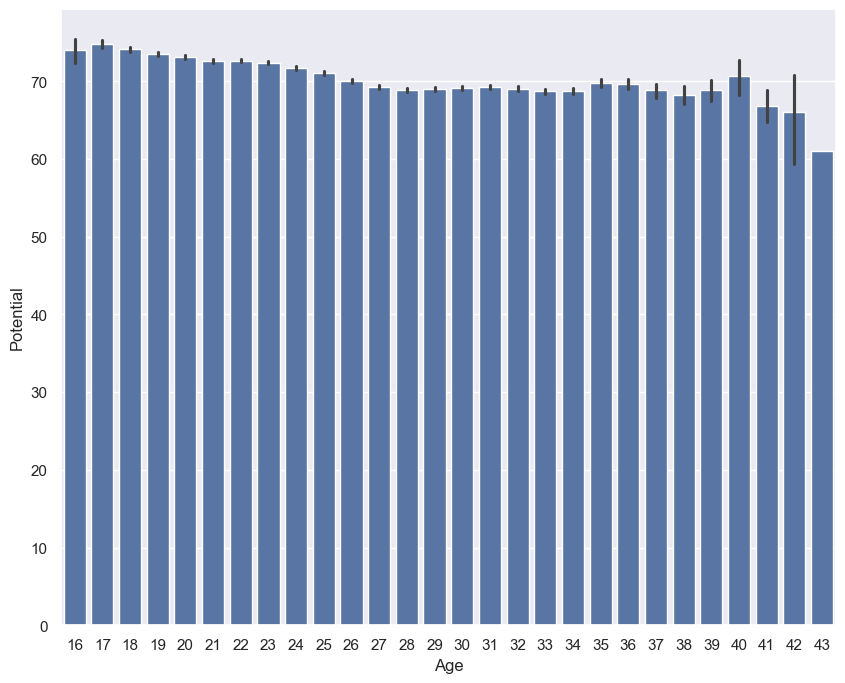

In [66]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'Age', y = 'Potential', data = perf_df)

In [67]:
scaler = StandardScaler()

perf_df_standardised = scaler.fit_transform(perf_df[['Age','Potential']])
perf_df_standardised = pd.DataFrame(perf_df_standardised, columns = ['Age', 'Potential'])
perf_df_standardised.corr()

Age  Potential
Age        1.000000  -0.268569
Potential -0.268569   1.000000

<Axes: >

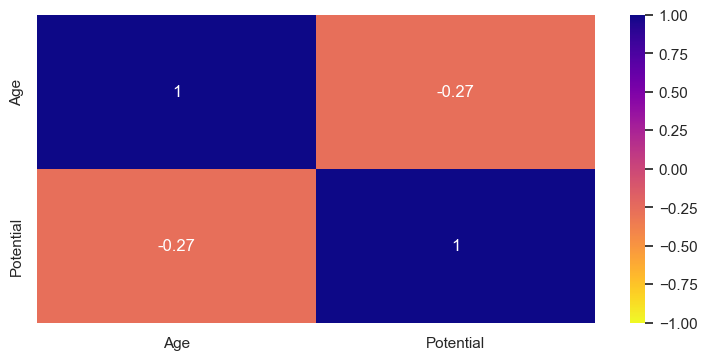

In [68]:
plt.figure(figsize = (9,4))
sns.heatmap(perf_df.corr(), vmin = -1, cmap = 'plasma_r', annot = True)

From Above Plots:
- We can observe that the Age is inversely proportional to the Potential of the player.
- A player shows average peak potential at the age of 17. After that it decreases until 28 and remain almost the same until the age of 40.
- There are also a lot of outliers which indicates that despite being of higher ager, the player shows higher potential which is an exception for some cases.

In [70]:
perf_df['Value'] = df['value_eur']

ex.scatter(x = 'Age', y = 'Value', data_frame = perf_df,
           color = 'Age', opacity = 0.5, marginal_x = 'box')

There is a steep increase in the Value of a Player until the age of 24-25 years and after that it gradually starts decreasing. It hits the lowest at the age of 43 and the Value hits the highest at 24.

Question 3:
- Which attributes are helpful in deciding a player's potential?
- How do the traits contribute to the players' potential?

In [75]:
skill_df = df[["attacking_crossing","attacking_finishing","attacking_heading_accuracy","attacking_short_passing","attacking_volleys","skill_ball_control","skill_curve","skill_dribbling",
                         "skill_fk_accuracy","skill_long_passing","movement_acceleration","movement_agility","movement_balance","movement_reactions","movement_sprint_speed","power_jumping",
                         "power_long_shots","power_shot_power","power_stamina","power_strength","mentality_aggression","mentality_composure","mentality_interceptions","mentality_penalties",
                         "mentality_positioning","mentality_vision","defending_marking_awareness","defending_sliding_tackle","defending_standing_tackle","goalkeeping_diving","goalkeeping_handling","goalkeeping_kicking",
                         "goalkeeping_positioning","goalkeeping_reflexes", "potential"]]

# replacing the null values with the minimum of the column values
for index in skill_df.columns :
    skill_df[index].fillna(value = skill_df[index].min(), inplace = True)

/var/folders/r8/zqmq4mj91p1f_0yg_2vxkx_80000gn/T/ipykernel_1894/3208709663.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

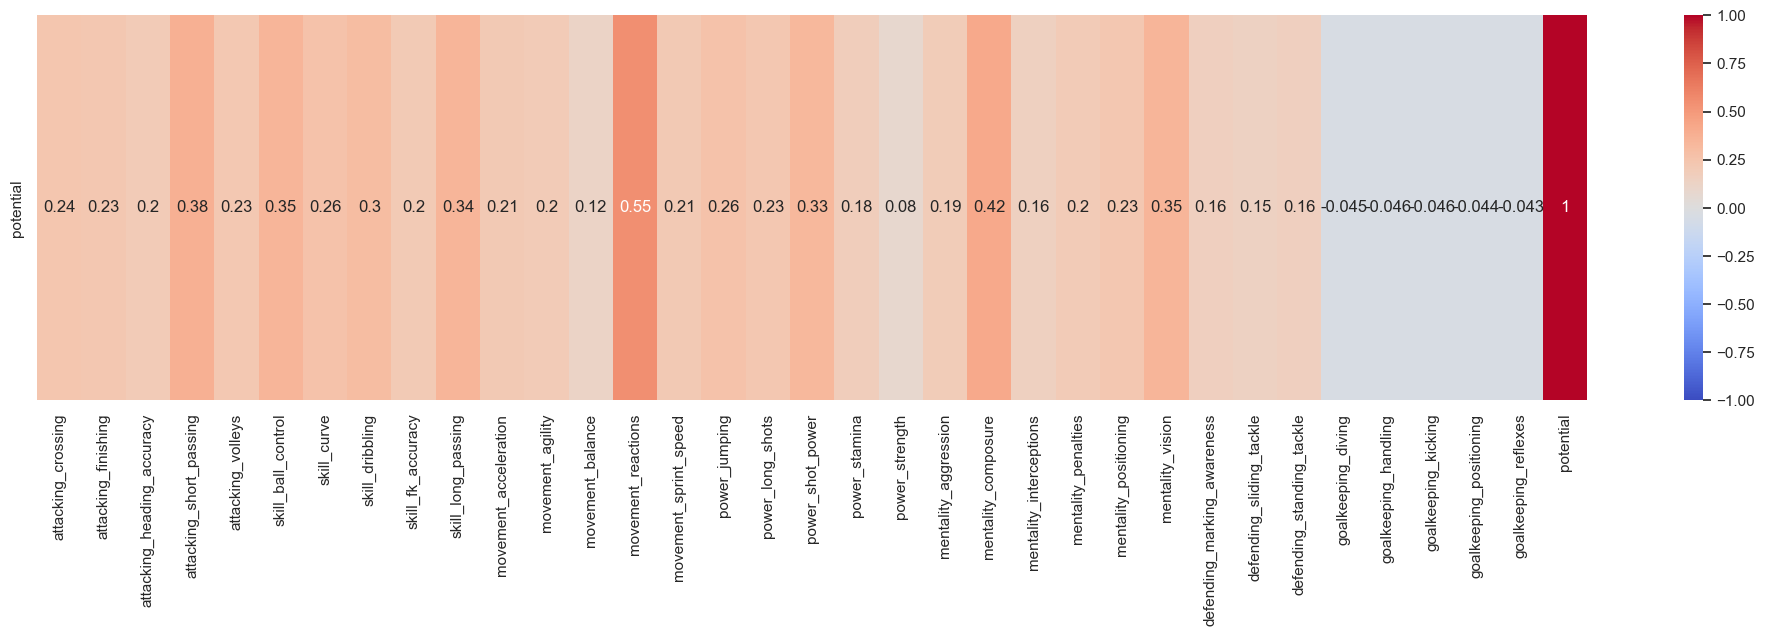

In [77]:
plt.figure(figsize=(25,5))
a = skill_df.corr().loc['potential':]
sns.heatmap(a, vmin=-1, cmap='coolwarm', annot = True)

From the Heatmap, we can observe that Reactions, Composure, Vision, ShortPassing, LongPassing  and ShotPower are the columns which have comparatively greater impact on the Potential of a player

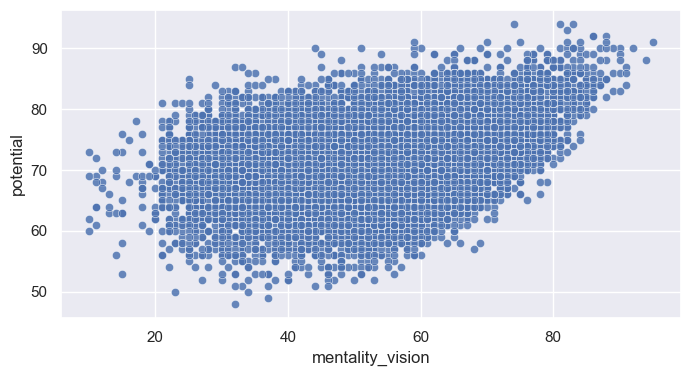

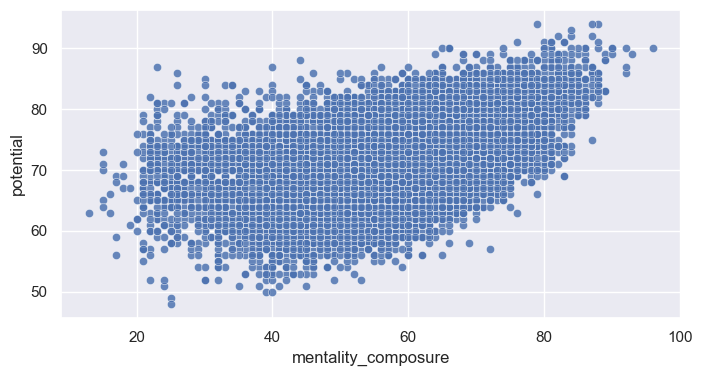

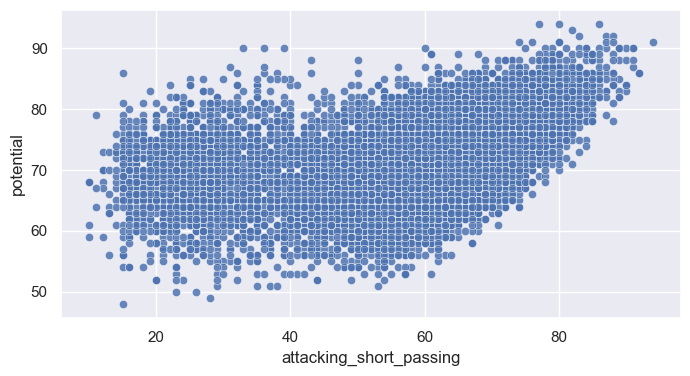

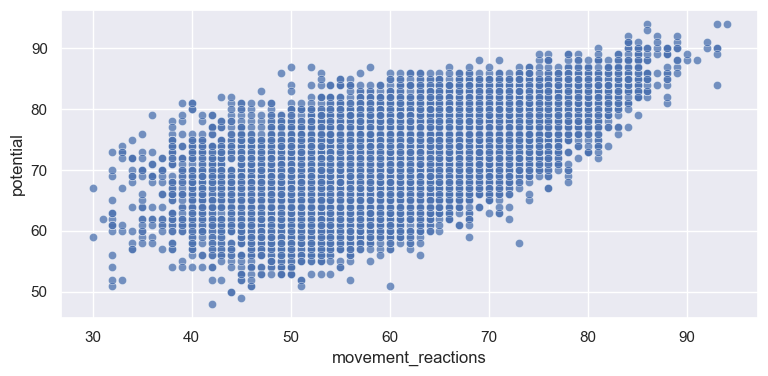

In [78]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'mentality_vision', y = 'potential', data = skill_df, alpha=0.6)
plt.show()
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'mentality_composure', y = 'potential', data = skill_df, alpha=0.6)
plt.show()
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'attacking_short_passing', y = 'potential', data = skill_df, alpha=0.6)
plt.show()
plt.figure(figsize=(9,4))
sns.scatterplot(x = 'movement_reactions', y = 'potential', data = skill_df, alpha=0.5)
plt.show()

From these graphs, we can observe that as we had before, these attributes are correlated with the potential of a player.

Question 4 :
- Which features directly contribute to the wages of the players?

In [79]:
wage_data = {'Potential' : df['potential'], 'Overall' : df['overall'], 'Value' : df['value_eur'],
             'Height' : df['height_cm'], 'Weight' : df['weight_kg'], 'International Reputation' : df['international_reputation'],
             'Wage' : df['wage_eur']}
wage_df = pd.DataFrame(wage_data)

<Axes: >

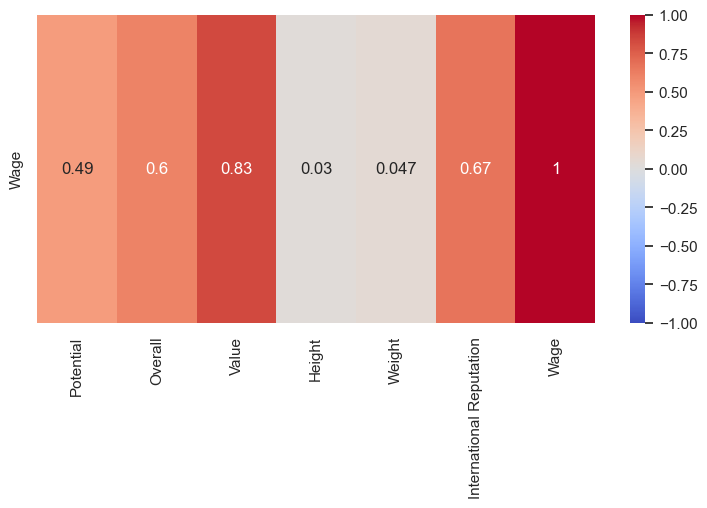

In [80]:
wage_corr_matrix = wage_df.corr().loc['Wage':]
plt.figure(figsize=(9,4))
sns.heatmap(wage_corr_matrix, vmin=-1, cmap='coolwarm', annot = True)

<Axes: xlabel='Value', ylabel='Wage'>

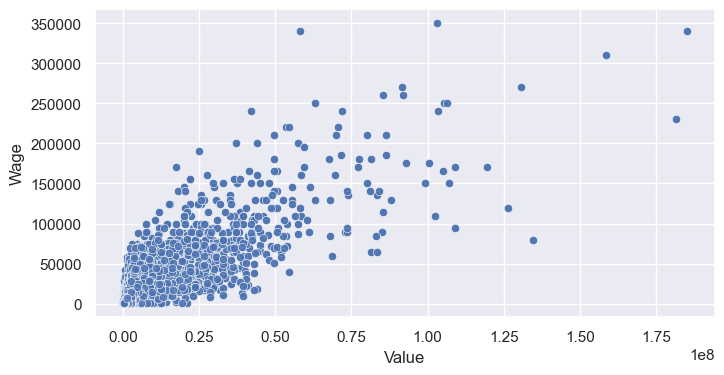

In [81]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'Value', y ='Wage', data = wage_df, alpha=0.8)

So the Wage of a player is almost proportional to the Value of a player. If the value of the player increases, the wage of the player also increases.
From the heatmap, we can observe that the wage is mostly determined by the value, the international reputation and the overall, which means that the wage is more determined by the current level of the player than his potential, and that the height and the weight of the player are not factors for the wage.

/var/folders/r8/zqmq4mj91p1f_0yg_2vxkx_80000gn/T/ipykernel_1894/2318726867.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='International Reputation', ylabel='Wage'>

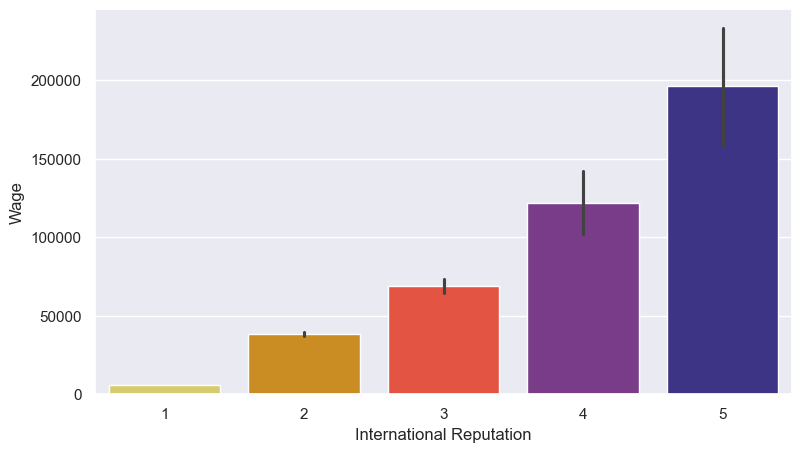

In [82]:
plt.figure(figsize=(9,5))
sns.barplot(x = 'International Reputation', y ='Wage',
            palette='CMRmap_r' ,data = wage_df)

Question 5:
- What is the age distribution in different clubs?
- Which club has most young players?

In [83]:
data = {'Age': df['age'], 'Club' : df['club_name']}
age_club_df = pd.DataFrame(data)

datas = age_club_df.groupby(by='Club', as_index=False).mean()
datas = datas.sort_values(by = 'Age', ascending = True)

datas.head(10)

Club        Age
603                     UCD  20.428571
631           Villarreal II  20.800000
100    Borussia Dortmund II  21.185185
227             FC Volendam  21.300000
515                Salzburg  21.464286
245             Freiburg II  21.500000
448     Peterborough United  21.720000
411            Nordsjælland  21.892857
577              Sunderland  22.000000
133  Central Coast Mariners  22.296296

In [84]:
ex.bar(x = 'Club', y = 'Age', data_frame= datas.head(10),
      color='Club')

This graph provides several reserve teams. The teams with the youngest players are UCD (Ireland), Volendam (Netherlands) and Salzburg (Austria).